In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
import numpy as np

In [9]:
data = pd.read_csv('Rainfall.csv')

In [10]:
data = data.drop(columns=['Date'])

In [11]:
data = data.dropna()

In [12]:
label_encoder = {}
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [13]:
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoder[col] = le

In [14]:
data['RainToday'] = data['RainToday'].apply(lambda x: 1 if x == 'Yes'else 0)
data['RainTomorrow'] = data['RainTomorrow'].apply(lambda x: 1 if x == 'Yes'else 0)

In [15]:
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('RainTomorrow')
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [16]:
x_class = data.drop(columns=['RainTomorrow'])
y_class = data['RainTomorrow']

In [17]:
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x_class, y_class, test_size=0.2, random_state=42)

In [18]:
x_reg = data.drop(columns=['RainTomorrow'])
y_reg = data['Rainfall']

In [19]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)

In [20]:
clf = RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(x_train_class, y_train_class)
y_pred_class = clf.predict(x_test_class)
accuracy_class = accuracy_score(y_test_class, y_pred_class)
conf_matrix_class = confusion_matrix(y_test_class, y_pred_class)
class_report_class = classification_report(y_test_class, y_pred_class)

In [21]:
reg = RandomForestRegressor(n_estimators=100,random_state=42)
reg.fit(x_train_reg, y_train_reg)
y_pred_reg = reg.predict(x_test_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
r2_reg = r2_score(y_test_reg, y_pred_reg)

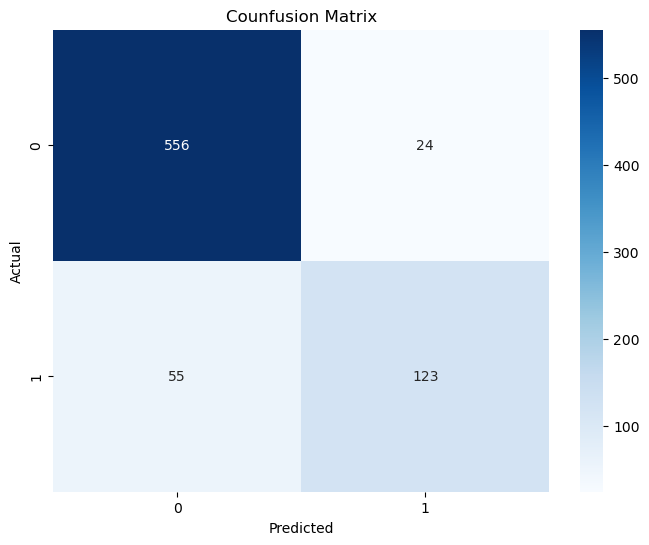

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_class, annot=True, fmt='d', cmap='Blues')
plt.title('Counfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

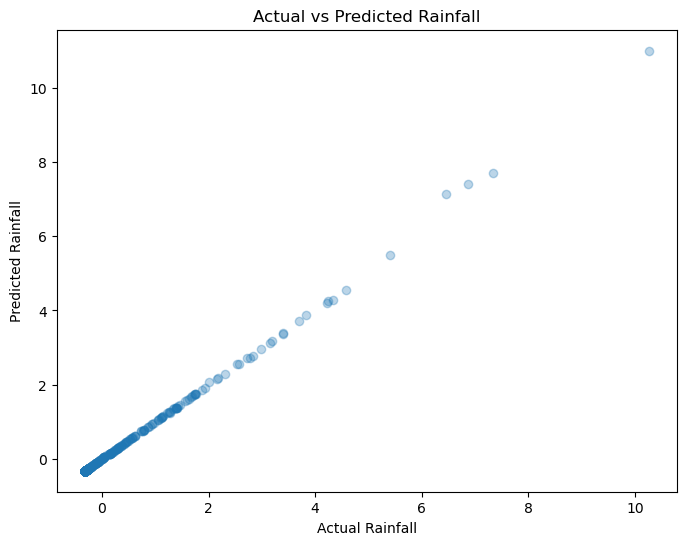

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.3)
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.show()

In [24]:
print('Classification Task')
print('Accuracy:', accuracy_class)
print('Confusion Matrix:\n', conf_matrix_class)
print('Classification Report:\n', class_report_class)

Classification Task
Accuracy: 0.895778364116095
Confusion Matrix:
 [[556  24]
 [ 55 123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       580
           1       0.84      0.69      0.76       178

    accuracy                           0.90       758
   macro avg       0.87      0.82      0.85       758
weighted avg       0.89      0.90      0.89       758



In [25]:
print('Regression Task')
print('Mean Squared Error:', mse_reg)
print('R-squared:', r2_reg)

Regression Task
Mean Squared Error: 0.001958661877643246
R-squared: 0.9976571400459955
